# DataSpark: Illuminating Insights for Global Electronics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Customer analysis

In [2]:
customer_analysis=pd.read_csv("Customers.csv", encoding="ISO-8859-1")
customer_analysis

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [3]:
customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
customer_analysis.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [5]:
missing_state_code_rows = customer_analysis[customer_analysis['State Code'].isnull()]
print(missing_state_code_rows)

      CustomerKey  Gender                Name               City State Code  \
5304       729681  Female    Rossana Padovesi            Polvica        NaN   
5316       732289    Male        Indro Piccio          Varcaturo        NaN   
5372       742042    Male     Amaranto Loggia          Casaferro        NaN   
5377       742886  Female       Edmonda Capon           Terzigno        NaN   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco        NaN   
5485       759705    Male    Callisto Lo Duca            Casilli        NaN   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi        NaN   
5531       766410    Male   Adelmio Beneventi             Licola        NaN   
5631       781667  Female          Ilda Manna             Napoli        NaN   
5695       789177    Male   Calogero Folliero      Mariglianella        NaN   

       State Zip Code Country Continent    Birthday  
5304  Napoli    80035   Italy    Europe   4/18/1981  
5316  Napoli    80014 

In [6]:
# State code of Napoli is NA
customer_analysis = customer_analysis.fillna("NA")

In [7]:
customer_analysis.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [8]:
# datetime format adjustment for 'Birthday' column as YYYY/MM/DD

customer_analysis['Birthday'] = customer_analysis['Birthday'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
customer_analysis.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939/07/03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979/09/27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947/05/26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957/09/17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965/11/19


### Gender Distribution

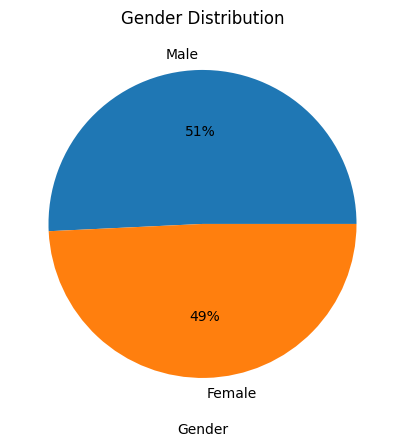

In [9]:
plt.figure(figsize=(12,5))
plt.pie(customer_analysis["Gender"].value_counts(),autopct='%1.0f%%',labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()

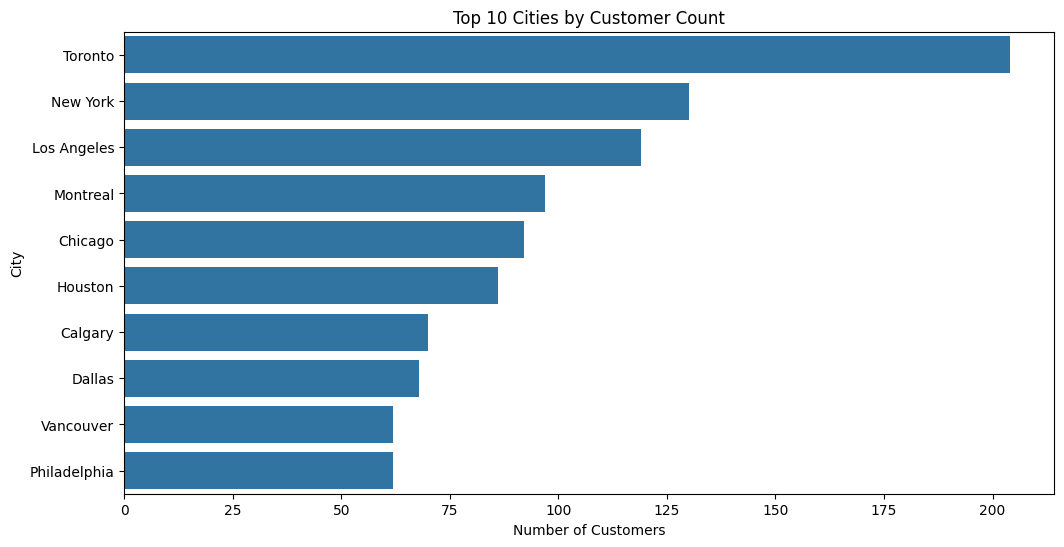

In [10]:
# Top 10 Cities by Customer Count
top_cities = customer_analysis['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(top_cities))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


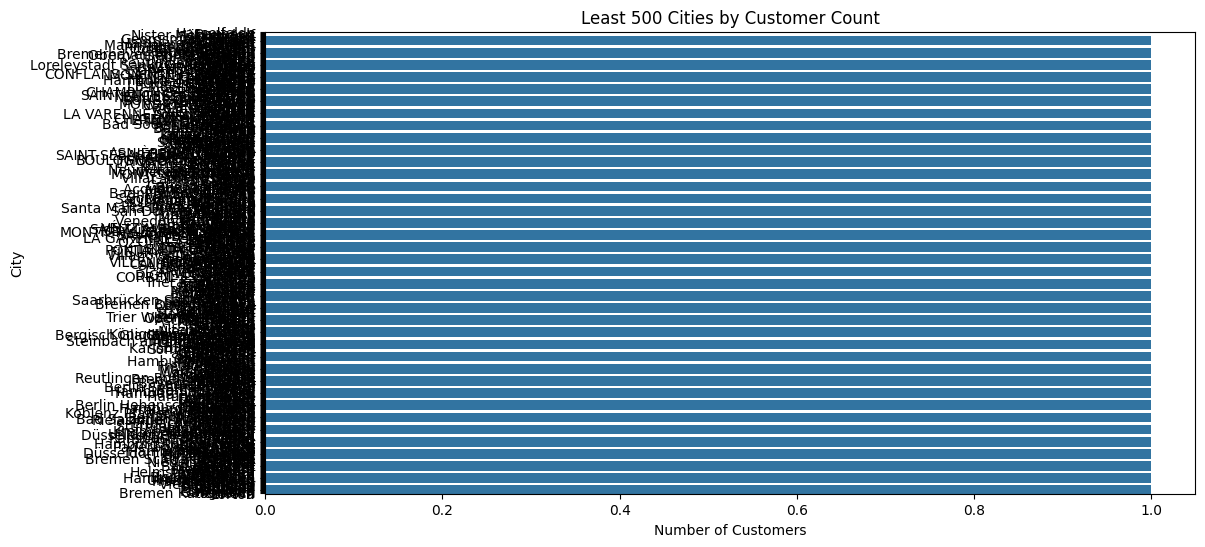

In [11]:
# Least 500 Cities by Customer Count
top_cities = customer_analysis['City'].value_counts().tail(500)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(top_cities))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Least 500 Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


In [12]:
# More than 500 cities are having only one customer

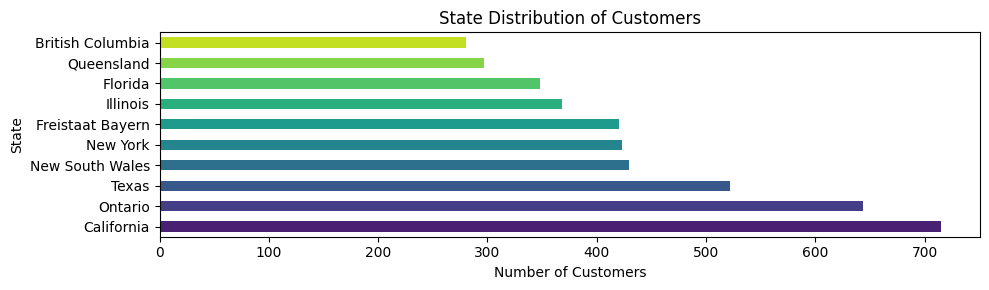

In [13]:
# State Distribution as a Horizontal Bar Chart
state_counts = customer_analysis['State'].value_counts().head(10)
plt.figure(figsize=(10, len(state_counts) * 0.3))  # Adjust height based on the number of states
state_counts.plot(kind='barh', color=sns.color_palette("viridis", len(state_counts)))
plt.title("State Distribution of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.tight_layout()  # Ensures everything fits well
plt.show()


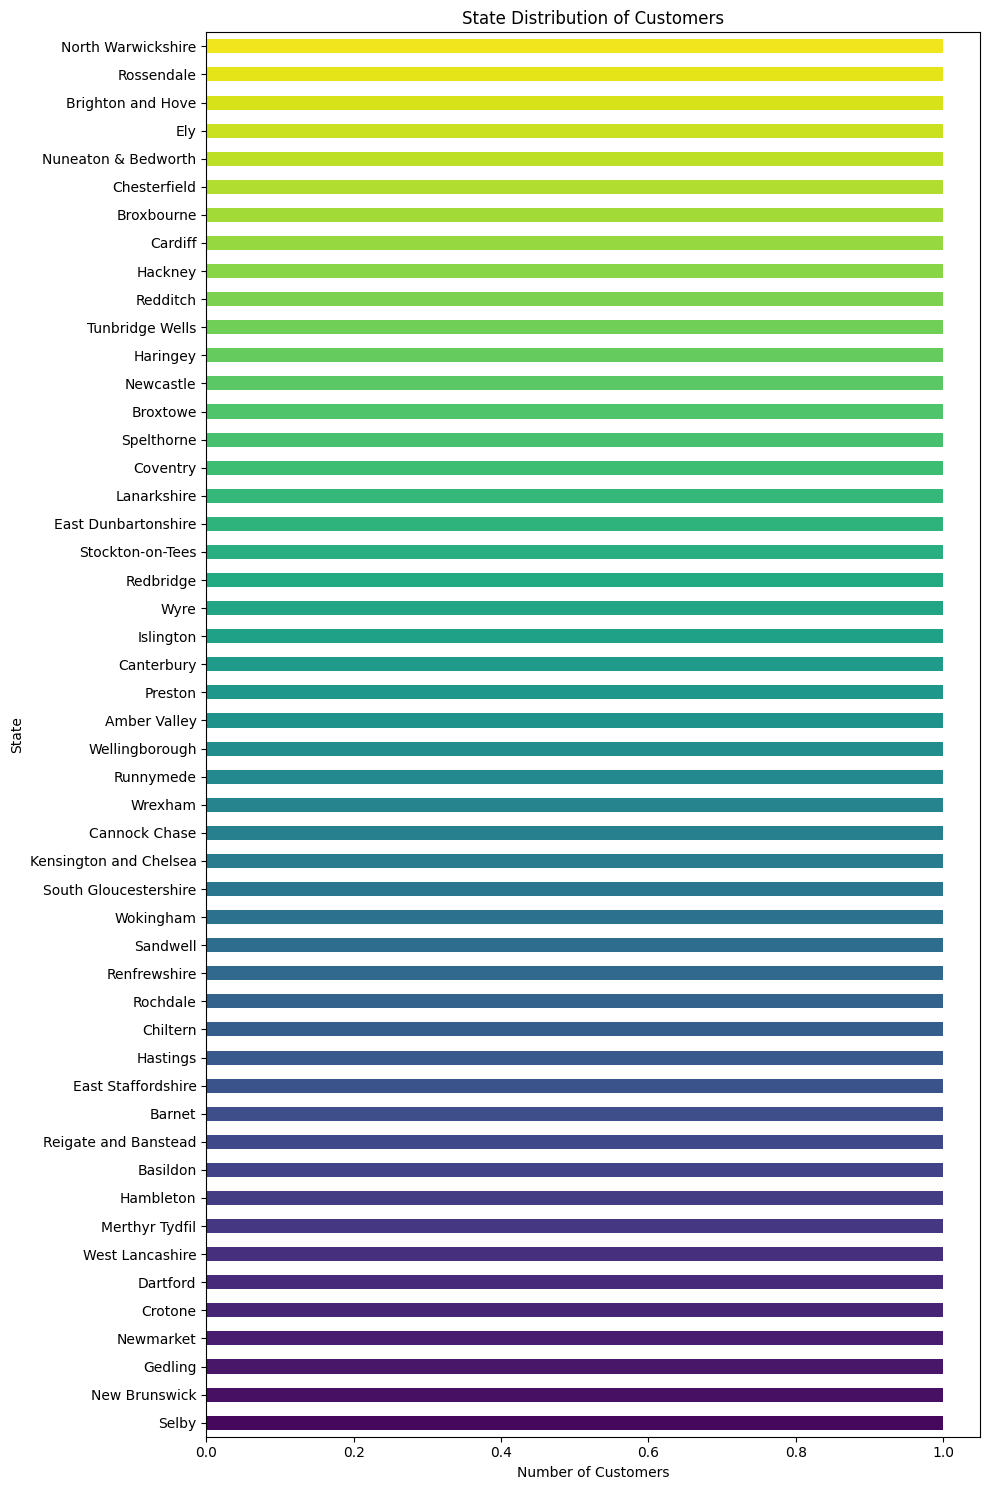

In [14]:
# State Distribution as a Horizontal Bar Chart
state_counts = customer_analysis['State'].value_counts().tail(50)
plt.figure(figsize=(10, len(state_counts) * 0.3))  # Adjust height based on the number of states
state_counts.plot(kind='barh', color=sns.color_palette("viridis", len(state_counts)))
plt.title("State Distribution of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.tight_layout()  # Ensures everything fits well
plt.show()


### Country Distribution bu customers

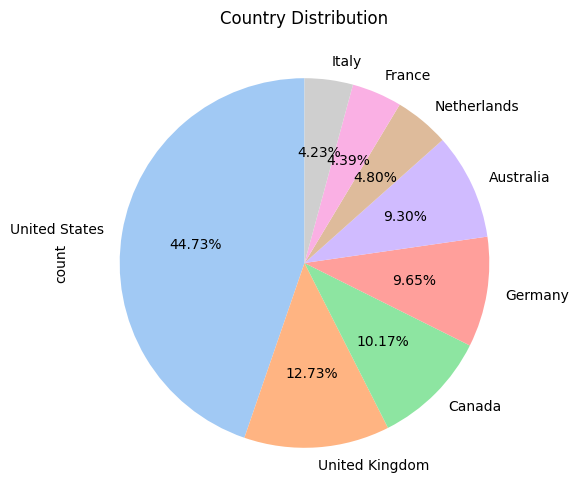

In [15]:
plt.figure(figsize=(8, 6))
customer_analysis['Country'].value_counts().plot(kind="pie", autopct="%.2f%%", colors=sns.color_palette("pastel"), startangle=90)
plt.title("Country Distribution")
plt.show()

In [16]:
np.random.seed(42)  # For reproducibility
customer_analysis['Order_Count'] = np.random.randint(1, 20, size=len(customer_analysis))  # Simulate 1 to 20 purchases
customer_analysis['Average_Order_Value'] = np.random.uniform(20, 200, size=len(customer_analysis)) 

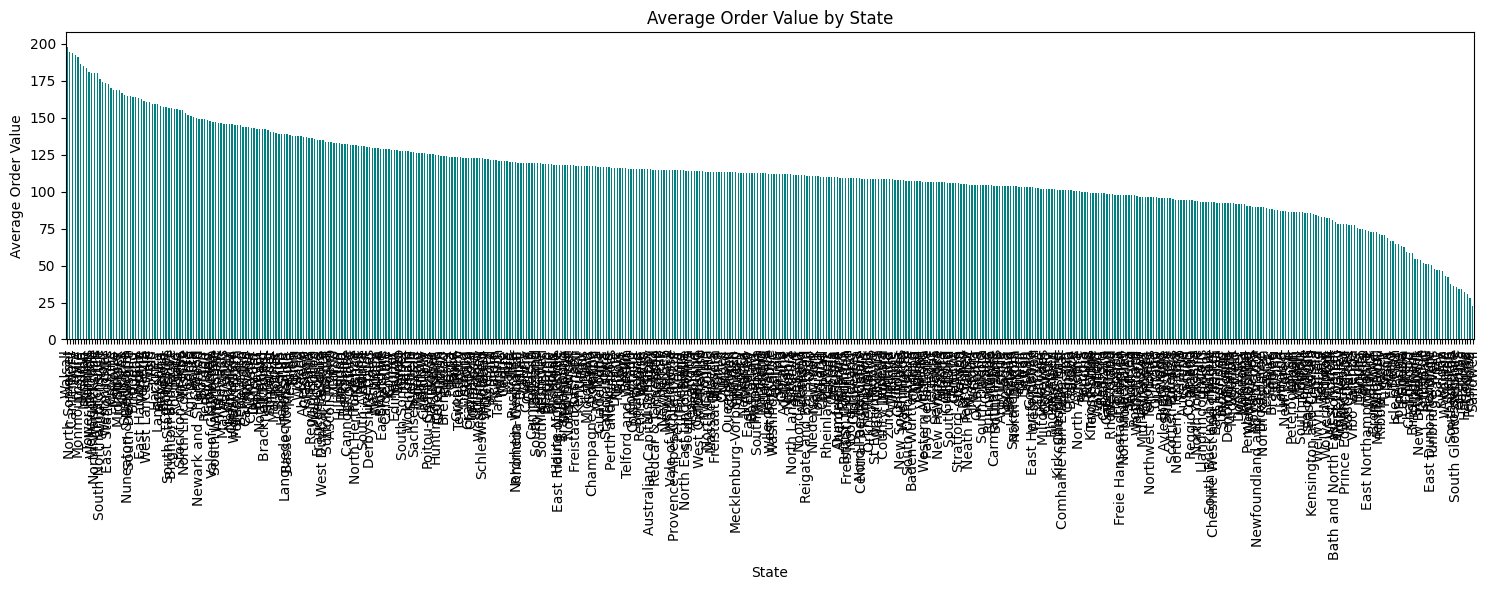

In [17]:
state_aov = customer_analysis.groupby('State')['Average_Order_Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
state_aov.plot(kind='bar', color="teal")
plt.title("Average Order Value by State")
plt.xlabel("State")
plt.ylabel("Average Order Value")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


In [18]:
# Avereage order value by country is equal

## Data dictionary

In [19]:
pd.read_csv("Data_Dictionary.csv")

,Table,Field,Description
0,Sales,Order Number,Unique ID for each order
1,Sales,Line Item,Identifies individual products purchased as pa...
2,Sales,Order Date,Date the order was placed
3,Sales,Delivery Date,Date the order was delivered
4,Sales,CustomerKey,Unique key identifying which customer placed t...
5,Sales,StoreKey,Unique key identifying which store processed t...
6,Sales,ProductKey,Unique key identifying which product was purch...
7,Sales,Quantity,Number of items purchased
8,Sales,Currency Code,Currency used to process the order
9,Customers,CustomerKey,Primary key to identify customers


## Exchange Rates

In [20]:
df=pd.read_csv("Exchange_Rates.csv")
df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [22]:
df.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [23]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
df.head()


,Date,Currency,Exchange
0,2015/01/01,USD,1.0000
1,2015/01/01,CAD,1.1583
2,2015/01/01,AUD,1.2214
3,2015/01/01,EUR,0.8237
4,2015/01/01,GBP,0.6415


In [24]:
currency = df['Currency'].value_counts().index
currency

Index(['USD', 'CAD', 'AUD', 'EUR', 'GBP'], dtype='object', name='Currency')

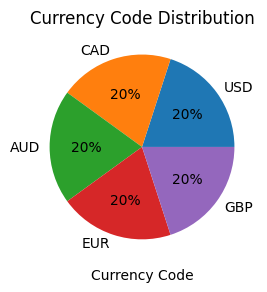

In [25]:
plt.figure(figsize=(6,3))
plt.pie(df['Currency'].value_counts(),autopct='%1.0f%%',labels=currency)
plt.xlabel('Currency Code')
plt.title('Currency Code Distribution')
plt.show()

## Products

In [26]:
products=pd.read_csv("Products.csv")
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [27]:
products["Unit Cost USD"] = products["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
products["Unit Cost USD"] = products["Unit Cost USD"].astype(float)

products["Unit Price USD"] = products["Unit Price USD"].str.replace("$", "").str.replace(",", "")
products["Unit Price USD"] = products["Unit Price USD"].astype(float)

In [28]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [29]:
products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

### Brands in products

In [30]:
brands = products['Brand'].value_counts().index
brands

Index(['Contoso', 'Fabrikam', 'Litware', 'Proseware', 'Adventure Works',
       'Southridge Video', 'Wide World Importers', 'The Phone Company',
       'Tailspin Toys', 'A. Datum', 'Northwind Traders'],
      dtype='object', name='Brand')

### Brand distribution identifying most and least popular products based on products data

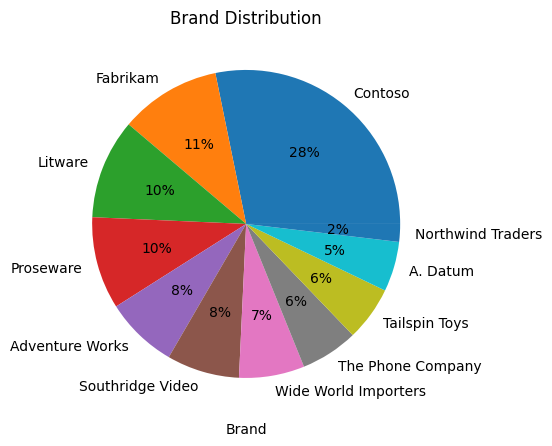

In [31]:
plt.figure(figsize=(12,5))
plt.pie(products['Brand'].value_counts(),autopct='%1.0f%%',labels=brands)
plt.xlabel('Brand')
plt.title('Brand Distribution')
plt.show()

### Profitability Analysis

In [32]:
products['Profit Margin (%)'] = ((products['Unit Price USD'] - products['Unit Cost USD']) / products['Unit Price USD']) * 100
print(products[['Product Name', 'Unit Cost USD', 'Unit Price USD', 'Profit Margin (%)']])


                                       Product Name  Unit Cost USD  \
0               Contoso 512MB MP3 Player E51 Silver           6.62   
1                 Contoso 512MB MP3 Player E51 Blue           6.62   
2                  Contoso 1G MP3 Player E100 White           7.40   
3                 Contoso 2G MP3 Player E200 Silver          11.00   
4                    Contoso 2G MP3 Player E200 Red          11.00   
...                                             ...            ...   
2512    Contoso Bluetooth Active Headphones L15 Red          43.07   
2513  Contoso Bluetooth Active Headphones L15 White          43.07   
2514             Contoso In-Line Coupler E180 White           1.71   
2515             Contoso In-Line Coupler E180 Black           1.71   
2516            Contoso In-Line Coupler E180 Silver           1.71   

      Unit Price USD  Profit Margin (%)  
0              12.99          49.037721  
1              12.99          49.037721  
2              14.52          49.

In [33]:
# Visualization in power B I

### Category Analysis by categories

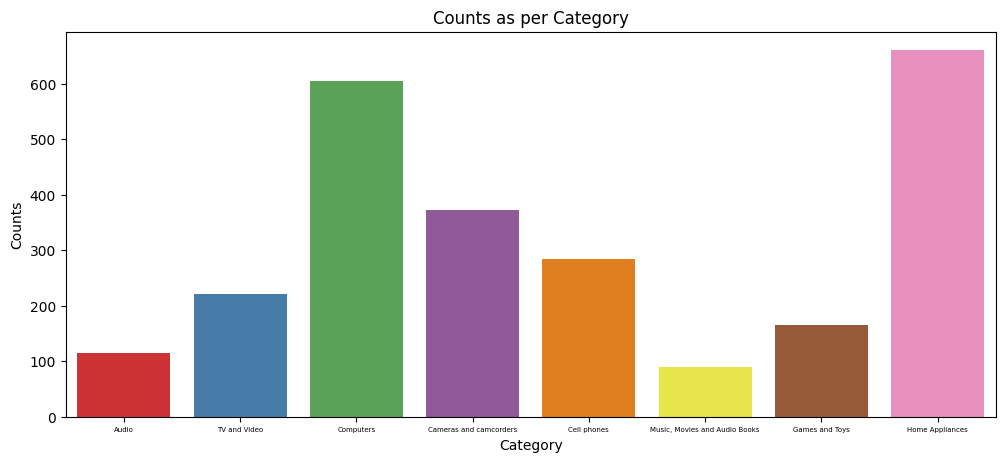

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x=products["Category"], data=products, hue ='Category', palette='Set1')
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks(rotation=0, size=5)
plt.title("Counts as per Category")
plt.show()


### Category Analysis by subcategories

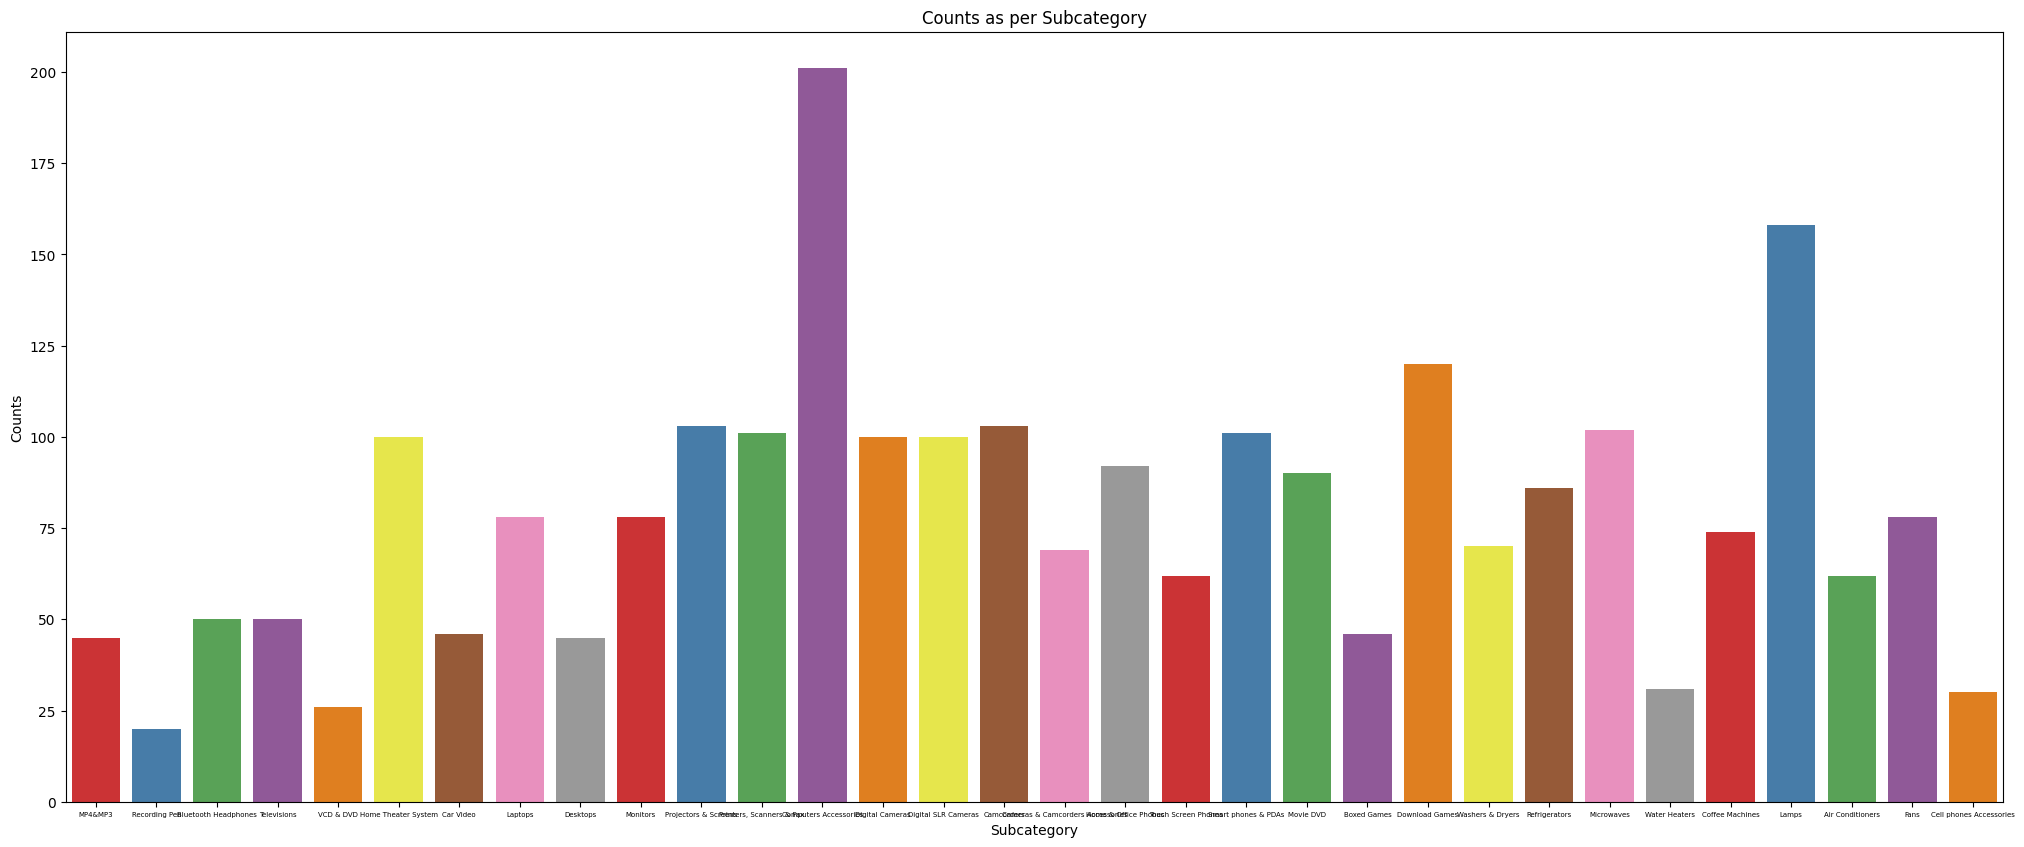

In [36]:
plt.figure(figsize=(25,10))
sns.countplot(x=products["Subcategory"], data=products, hue ='Subcategory', palette='Set1')
plt.xlabel("Subcategory")
plt.ylabel("Counts")
plt.xticks(rotation=0, size=5)
plt.title("Counts as per Subcategory")
plt.show()


## Stores data

In [37]:
stores=pd.read_csv("Stores.csv")
stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [38]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [39]:
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [40]:
stores['Square Meters'] = stores['Square Meters'].fillna(0)
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [41]:
stores['Open Date'] = stores['Open Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d')) # datetime format adjustment for 'Open Date' column as YYYY/MM/DD
stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008/01/01
1,2,Australia,Northern Territory,665.0,2008/01/12
2,3,Australia,South Australia,2000.0,2012/01/07
3,4,Australia,Tasmania,2000.0,2010/01/01
4,5,Australia,Victoria,2000.0,2015/12/09


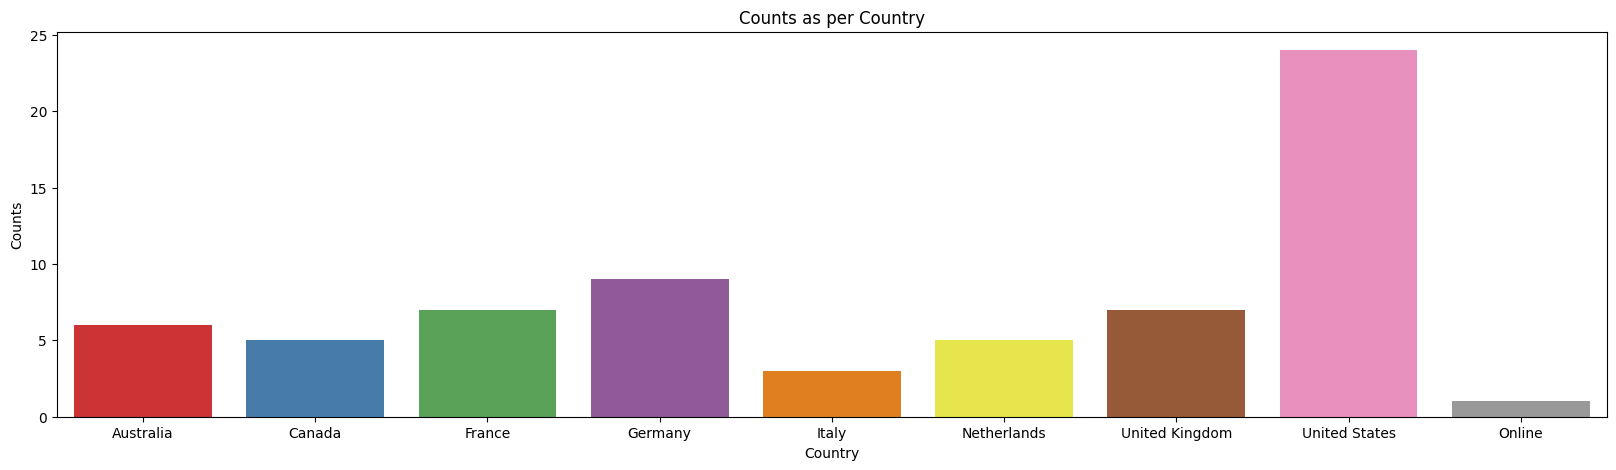

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x=stores["Country"], data=stores, hue ='Country', palette='Set1')
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")
plt.show()

## Sales data

In [43]:
sales=pd.read_csv("Sales.csv")
sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [44]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [45]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [46]:
# datetime format adjustment for 'Date' column as YYYY/MM/DD
sales['Order Date'] = sales['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016/01/01,NaN,265598,10,1304,1,CAD
1,366001,1,2016/01/01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016/01/01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016/01/01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016/01/01,1/12/2016,266019,0,373,1,CAD


In [47]:
# fill the missing values
sales["Delivery Date"]=sales["Delivery Date"].fillna(0)
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016/01/01,0,265598,10,1304,1,CAD
1,366001,1,2016/01/01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016/01/01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016/01/01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016/01/01,1/12/2016,266019,0,373,1,CAD


### Currency code Distribution

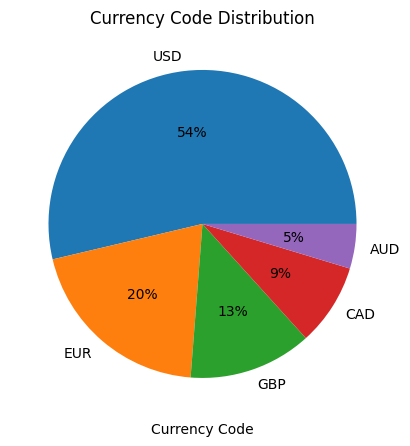

In [49]:
plt.figure(figsize=(12,5))
plt.pie(sales['Currency Code'].value_counts(),autopct='%1.0f%%',labels=sales['Currency Code'].value_counts().index)
plt.xlabel('Currency Code')
plt.title('Currency Code Distribution')
plt.show()